# This is a K-Means Clustering Analysis to Segment Customers of a Retail Store According to Their Satisfaction and Loyalty.

## Importing the relevant libraries

In [1]:
# For this exercise, we will need the following libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # Set the default plot styles to Seaborn

# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

## Load the raw data

In [2]:
# We will now load the data from the .csv file in the project folder and store it in a data frame called raw_data.
raw_data = pd.read_csv ('/Users/GoriPNEUMA/Documents/DataSpell Files/My Portfolio/K-Means Clustering Project 1/Customer Segmentation for a Retail Store/Customer Satisfaction and Loyalty Scores.csv')

# We will explore the top 10 rows of the data frame to see what our data looks like.
raw_data.head(10)

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


## Brief description of the data

The scores for "Satisfaction" are from customer ratings while the "Loyalty" scores have been calculated from the number of purchases made by each customer over a specified period. Some of the Loyalty values are negative because the whole Loyalty data has been standardised. We will see the implication of this standardisation later on in this exercise.

## Preprocessing (Data Cleaning)

### Exploring some descriptive statistics of the variables

In [3]:
raw_data.describe()

,Satisfaction,Loyalty
count,30.000000,30.000000
mean,6.400000,0.001000
std,2.620871,1.016476
min,1.000000,-1.690000
25%,4.250000,-0.967500
50%,7.000000,0.150000
75%,8.750000,0.947500
max,10.000000,1.380000


1. Customer information was obtained from 30 customers of the store
2. The "Satisfaction" score was on a scale of 1 (min) to 10 (max)
3. The average satisfaction rating (mean) was 6.4

### Checking for missing values

In [4]:
raw_data.isnull().sum() # Gives us the total number of missing values per variable.

Satisfaction    0
Loyalty         0
dtype: int64

No missing values. Let's proceed...

### Checking for duplicate values

In [5]:
raw_data.duplicated().sum()

0

No duplicate values. Let's proceed...

## Plotting the data

In [6]:
# Let us first make a copy of our raw data before proceeding with any modifications to the data:
data = raw_data.copy()

findfont: Font family ['sans_bold'] not found. Falling back to DejaVu Sans.


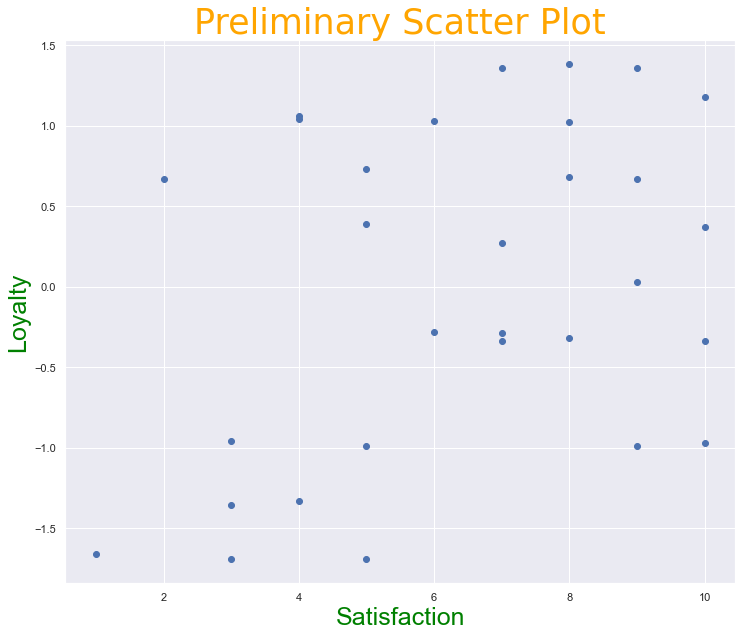

In [7]:
# We will now create a preliminary scatter plot and make any necessary observation(s).
plt.figure(figsize=(12,10)) # Formatting our plot size
plt.scatter(data['Satisfaction'],data['Loyalty'])
# Name your axes
plt.title("Preliminary Scatter Plot", size=35, font="sans_bold", c="orange")
plt.xlabel('Satisfaction', size=25, c="green")
plt.ylabel('Loyalty', size=25, c="green")
plt.show()

We can observe that there seem to be 2 distinct clusters: the smaller one around the bottom left of the plot and the larger one towards the top right. We will proceed with our clustering analysis so we can arrive at a more interpretable result later on.

## Selecting the appropriate features for clustering

In [8]:
# As we will be using the only two available variables ("Satisfaction" & "Loyalty") for our clustering,
# ...we can select our features by just creating a copy of the data and storing it in "x":
x = data.copy()

## Actual Clustering

In [9]:
# We will be using the "KMeans" module to perform our clustering, so we will create an object - kmeans

kmeans = KMeans(2) # The number in the brackets indicates the number of clusters we are aiming for...
                   # ...for now this number is 2.

# Fit the features in the kmeans clustering object:
kmeans.fit(x)

KMeans(n_clusters=2)

## Clustering results

What we want to do now is use our K-Means clustering algorithm to predict the cluster to which each of our observations belongs.

In [10]:
# First create a copy of our input data:
data_with_predicted_clusters = x.copy()

# Find the predicted clusters:
predicted_clusters = kmeans.fit_predict(x)

# Add a column to our new data frame (data_with_predicted_clusters) containing the...
# ...predicted cluster for each observation:
data_with_predicted_clusters["Predicted Clusters"] = predicted_clusters

# Let's view our new data frame:
data_with_predicted_clusters

,Satisfaction,Loyalty,Predicted Clusters
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


The Predicted Clusters column contains 0s and 1s showing there are just 2 clusters to allocate all observations to.

findfont: Font family ['sans_bold'] not found. Falling back to DejaVu Sans.


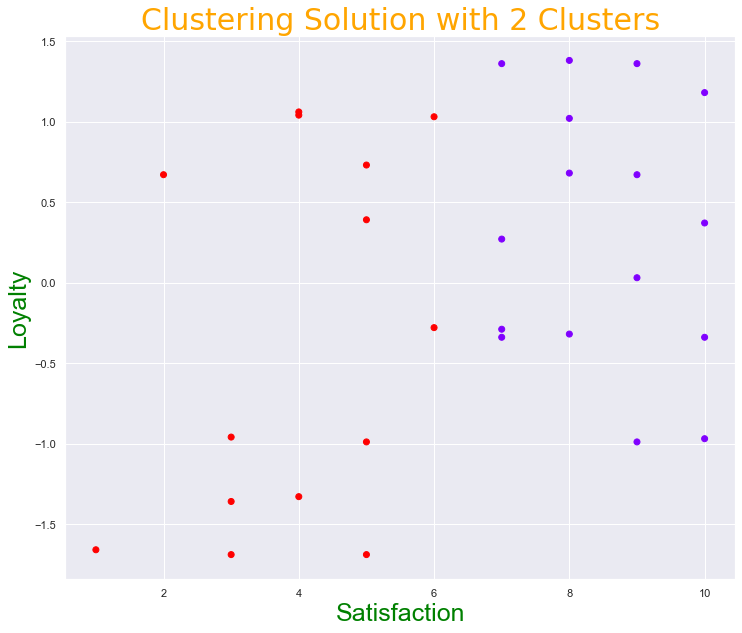

In [11]:
# We will now do a scatter plot of the data using the Satisfaction and the Loyalty values.

# Also, we will code the "c" (colour) argument according to the values in the "Predicted Clusters" column...
# ...so we can easily distinguish between the 2 clusters.
# All points in cluster 0 will be in one colour while all points in cluster 1 will be in another colour.

# The "cmap" is the color mapping argument. This chooses the default colour for each cluster.
# We will use "rainbow" as our value for cmap but there are other colour maps available.
# Here is a link to the matplotlib documentation showing other colour maps:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html

plt.figure(figsize=(12,10))
plt.scatter(data_with_predicted_clusters['Satisfaction'], data_with_predicted_clusters['Loyalty'],
            c=data_with_predicted_clusters['Predicted Clusters'], cmap='rainbow')
plt.title("Clustering Solution with 2 Clusters", size=30, font="sans_bold", c="orange")
plt.xlabel('Satisfaction', size=25, c="green")
plt.ylabel('Loyalty', size=25, c="green")
plt.show()

From the plot above, we can see the 2 different clusters separated by the 2 different colours (purple and red). We notice that the clustering was probably not as we expected; we probably thought the 5 purple points in the upper part of the plot would belong to the red cluster but that is not the case.

Another observation is that the 2 clusters seem to be vertically separated at the "Satisfaction" value of 6. If we draw a vertical line through 6, we see that all values to the left are in the purple cluster while all values to the right are in the red cluster. This implies that the clustering was predominantly done according to the "Satisfaction" variable; this can be explained. The relative weights (values) of the "Satisfaction" variable are considerably bigger than those of the "Loyalty" variable.

Considering the fact that both loyalty and satisfaction are equally important to our analysis, we must find a way for our clustering to be equally or almost equally based on both variables. The solution is to standardise the "Satisfaction" variable (recall that we identified earlier, under "Brief description of the data", that the "Loyalty" variable had been standardised).

## Standardise the variables

In [12]:
# We will import the "preprocessing" module from sklearn to standardise:
from sklearn import preprocessing

# Scale the inputs i.e. Scale each variable (column in x) with respect to itself.
# What this basically does is to take each observation from a column, subtract the mean of that column...
# ...from the observation and then divide by the standard deviation of the column.
x_scaled = preprocessing.scale(x)
x_scaled # The scaled inputs.

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

We will notice that comparing x_scaled above to x (which is just a copy of our original raw data), only the values for "Satisfaction" changes, the values for "Loyalty" remain the same because as we said earlier, "Loyalty" had already been standardised.

## Determine the right number of clusters for the analysis.

For this, we can use the "Elbow Method".

In clustering, our aim is to minimise the distance between points within a cluster and maximise the distance between clusters.
The "academic" term for distance between points within a cluster is called "Within-Cluster Sum of Squares" (WCSS).
Practically, we do not just want the minimum WCSS, but we want the lowest possible WCSS which will correspond to a reasonably small number of clusters.

Obviously, the fewer the clusters, the easier and more reasonable our segmentation analysis will be; we cannot have an infinitely large number of clusters because it would then be impossible to analyse.

The "Elbow Method" shows a plot of "WCSS" against "Number of Clusters" where WCSS reduces as Number of Clusters increases; the elbow of the plot is then used to approximately determine the right number of clusters to choose.

***

What we will do now is calculate several values of WCSS corresponding to several number of clusters, say between 1 and 10.
After obtaining the values, we will plot them against each other to obtain our Elbow plot.

In [13]:
# We will use a for loop to do this iterative calculation and obtain our values.

# First create an empty list
wcss =[]

# Create all possible cluster solutions (1 - 10) with the loop.
# We have chosen to get solutions from 1 to 10 clusters; we can amend this later if necessary.

for i in range(1,11): # Range 1 - 11 in Python refers to 1 - 10 as the last item is omitted.
    kmeans = KMeans(i) # Cluster solution with i clusters, where i is anything between 1 and 10
    kmeans.fit(x_scaled)  # Fit the STANDARDISED data
    wcss.append(kmeans.inertia_)  # Append the WCSS for each iteration (kmeans.inertia_ is the code to obtain WCSS)
    
# Let's check our list of WCSS for 1 - 10 clusters:
wcss

[59.99999999999999,
 29.818973034723143,
 17.913349527387965,
 10.24718180592842,
 7.792695153937187,
 6.569489487091783,
 5.326631124753926,
 4.412861350999043,
 3.905945719891534,
 3.3516013566455163]

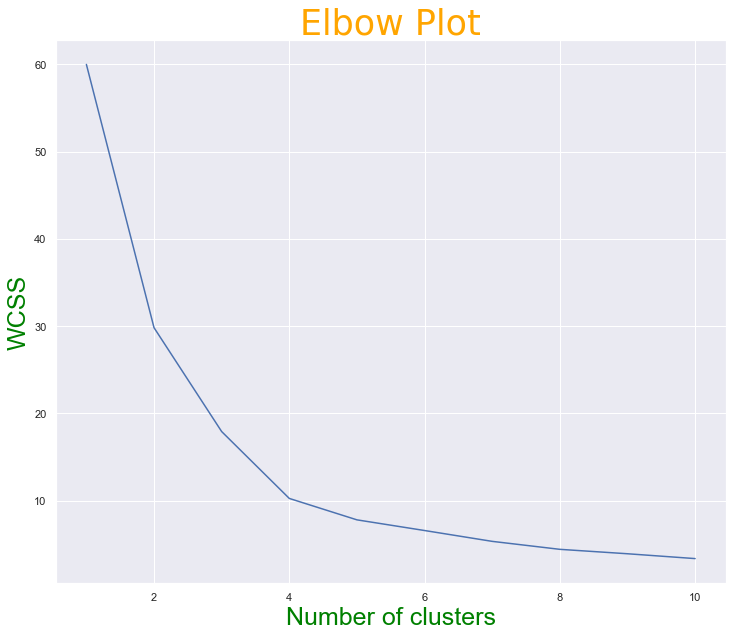

In [14]:
# Let's now plot the number of clusters vs WCSS:

plt.figure(figsize=(12,10))
plt.plot(range(1,11),wcss) # Plot of 1 - 10 clusters vs WCSS for each number.
plt.title("Elbow Plot", size=35, font="sans_bold", c="orange")
plt.xlabel('Number of clusters', size=25, c="green")
plt.ylabel('WCSS', size=25, c="green")
plt.show()

Examining the Elbow Plot, we can see that the "elbow" of the plot falls somewhere between 2 and about 5 clusters.

The idea is to choose a number of clusters for which its corresponding WCSS is low enough to the point where choosing a higher number of clusters will not make much difference in the reduction of the WCSS.

If we look at our list of WCSS values from the for loop earlier, we see heavy declines from the first value (59.99) to the 4th (10.25) and 5th (7.79) values; after which the rate of decline is significantly reduced. This implies we can use either 4 or 5 clusters to do our analysis.

## Explore clustering solutions with 4 or 5 clusters

In [15]:
# Let's use 4 clusters and see what our scatter plot looks like:

kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled) # Fit the STANDARDISED data

# Create a copy of our input data:
data_with_predicted_clusters_new = x.copy()

# Find the predicted clusters:
predicted_clusters_new = kmeans_new.fit_predict(x_scaled)

# Add a column to our new data frame (data_with_predicted_clusters_new) containing the...
# ...predicted cluster for each observation:
data_with_predicted_clusters_new["Predicted Clusters_New"] = predicted_clusters_new

# Let's view our new data frame:
data_with_predicted_clusters_new

,Satisfaction,Loyalty,Predicted Clusters_New
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,3
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,2
9,8,0.68,2


We may ask why the data above does not have the standardised values for "Satisfaction".

It is crucial at this point to note that although we have the original values above for each variable, the cluster prediction was done based on the standardised values.

It is good practice to plot our data using the original values for better interpretability. In this case for example, we can intuitively tell the level of satisfaction of the customers from the plot while our clustering solution is not negatively impacted.

Using the standardised values to plot the data may be misleading while interpreting the plot.

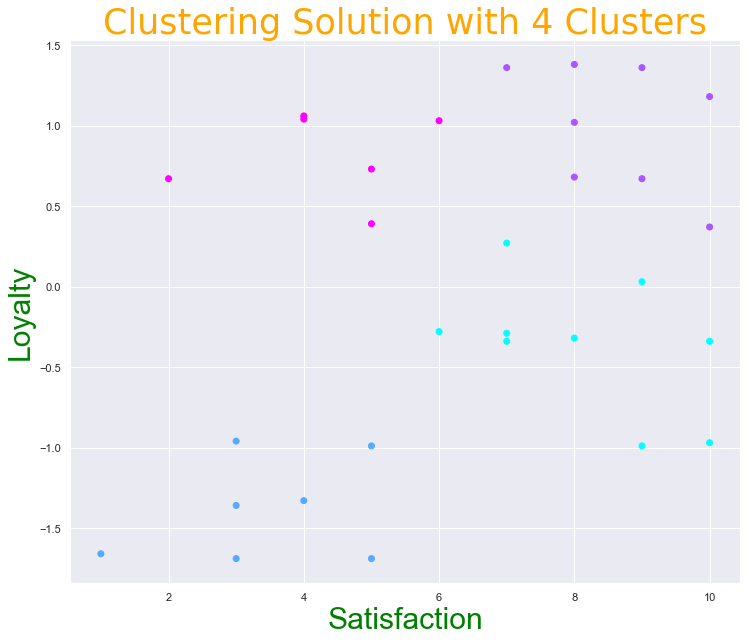

In [16]:
# Let's now plot our data and see the 4 different clusters:

plt.figure(figsize=(12,10))
plt.scatter(data_with_predicted_clusters_new['Satisfaction'],data_with_predicted_clusters_new['Loyalty'],
            c=data_with_predicted_clusters_new['Predicted Clusters_New'],cmap='cool')
plt.title("Clustering Solution with 4 Clusters", size=35, font="sans_bold", c="orange")
plt.xlabel('Satisfaction', size=30, c="green")
plt.ylabel('Loyalty', size=30, c="green")
plt.show()

## Interpretations to the store owner

We can now see the 4 different clusters representing your customers.

The blue cluster in the lower left corner represent customers who are mostly dissatisfied with your service and are mostly not loyal customers. You can refer to this group as "Alienated".

The pink cluster in the upper left corner represent customers who are also mostly dissatisfied with your service but are still loyal to you (they still patronise your business). You can refer to this group as "Supporters".

The turquoise cluster in the lower right corner represent customers who are mostly satisfied with your service but are not loyal (they don't patronise your business often). You can refer to this group as "Roamers".

The purple cluster in the upper right corner represent customers who are very satisfied with your service and are loyal (they patronise your business often). You can refer to this group as "Fans".

## Recommendations to the store owner

Your aim is to move as many customers as possible from other clusters to the "Fans" cluster.

We advise you focus more of your attention on the "Supporters" and "Roamers".

For the Supporters, many of them complained about long queues at the cash points. You may want to get more cash points and employ more cashiers to fix this.

To address the Roamers, you may want to consider issuing loyalty cards to all customers where points are obtained for every purchase they make and these points can be used to make purchases after they have accumulated to specified amounts.